## PS 5
## Donghai YU
## Feb. 18

## Q1

1(a)

In [209]:
import pandas as pd 
from pandas import Series, DataFrame 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
from sklearn.model_selection import LeaveOneOut, KFold
import statsmodels.api as sm
from scipy.interpolate import LSQUnivariateSpline

In [210]:
data = pd.read_csv('strongdrink.txt')
data['const'] = 1
data.head()

cultivar   alco  malic   ash   alk  magn  tot_phen  flav  nonfl_phen  \
0         1  14.23   1.71  2.43  15.6   127      2.80  3.06        0.28   
1         1  13.20   1.78  2.14  11.2   100      2.65  2.76        0.26   
2         1  13.16   2.36  2.67  18.6   101      2.80  3.24        0.30   
3         1  14.37   1.95  2.50  16.8   113      3.85  3.49        0.24   
4         1  13.24   2.59  2.87  21.0   118      2.80  2.69        0.39   

   proanth  color_int   hue  OD280rat  proline  const  
0     2.29       5.64  1.04      3.92     1065      1  
1     1.28       4.38  1.05      3.40     1050      1  
2     2.81       5.68  1.03      3.17     1185      1  
3     2.18       7.80  0.86      3.45     1480      1  
4     1.82       4.32  1.04      2.93      735      1

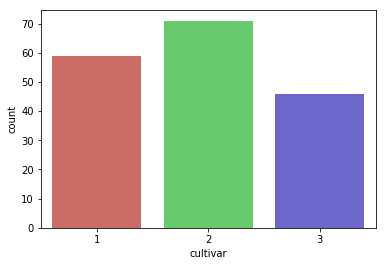

In [211]:
sns.countplot(x='cultivar', data=data, palette='hls')

In [212]:
X = data[['const', 'alco', 'malic', 'tot_phen', 'color_int']]
y = data['cultivar']

from sklearn.linear_model import LogisticRegression
X = data[['alco', 'malic', 'tot_phen', 'color_int']]
y = data['cultivar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)
MultLogReg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
MultLogReg.fit(X_train, y_train)
y_pred = MultLogReg.predict(X_test)
print(classification_report(y_test, y_pred))
print (f'The error rate for j=1 is {1-0.87} and the error rate for j=2 is 0.')
print(f'Validation set MSE = {mean_squared_error(y_test, y_pred)}')

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44

The error rate for j=1 is 0.13 and the error rate for j=2 is 0.
Validation set MSE = 0.045454545454545456


In [213]:
print('Estimated intercept for j=1:', MultLogReg.intercept_[0])
print('Estimated coefficients for j=1:', MultLogReg.coef_[0])
print()
print('Estimated intercept for j=2:', MultLogReg.intercept_[1])
print('Estimated coefficients for j=2:', MultLogReg.coef_[1])

Estimated intercept for j=1: -24.0105425421
Estimated coefficients for j=1: [ 1.70036744 -0.26560222  1.22389166  0.02276224]

Estimated intercept for j=2: 22.8027145909
Estimated coefficients for j=2: [-1.46806546 -0.33305465  0.66401745 -0.92271414]


In [214]:
LR.intercept_

array([-24.0108148,  22.8025761,   1.2082387])

In [215]:
MSE_vs = ((y_test - y_pred) ** 2).sum() / y_pred.shape[0]
print('Validation set MSE = ', MSE_vs)

Validation set MSE =  0.045454545454545456


Based to the error rates above, the precision rates for cultivar 2 and 3 are the best, which is 1.00. In this case, the best-performed predictions are not the ones with the largest amount of observations. The cultivar 3 only has 10 observations, three less than the observations in cultivar 1.

1(b) 

In [216]:
from sklearn.model_selection import LeaveOneOut
N_loo = X.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(X)
MSE = pd.DataFrame({'index': np.zeros(N_loo), 
                    'error': np.zeros(N_loo), 
                    'y_pred': np.zeros(N_loo),
                    'y_test': np.zeros(N_loo)})

In [217]:
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    MultLogReg1 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
    MultLogReg1.fit(X_train, y_train)
    y_pred = MultLogReg1.predict(X_test)
    MSE['index'][test_index] = test_index
    MSE['error'][test_index] = 1 - (1 if y_test.values[0] == y_pred[0] else 0)
    MSE['y_pred'][test_index] = y_pred
    MSE['y_test'][test_index] = y_test

error_1 = MSE[MSE['y_pred'] == 1]['error'].mean()
error_2 = MSE[MSE['y_pred'] == 2]['error'].mean()
error_3 = MSE[MSE['y_pred'] == 3]['error'].mean()    
    
print(classification_report(MSE['y_test'], MSE['y_pred'], digits =3))
print('The error rate for class 1 is', error_1, ', std is', MSE[MSE['y_pred'] == 1]['error'].std())
print('The error rate for class 2 is', error_2, ', std is', MSE[MSE['y_pred'] == 2]['error'].std())
print('The error rate for class 3 is', error_3, ', std is', MSE[MSE['y_pred'] == 3]['error'].std())

MSE_loo = MSE['error'].mean()
MSE_loo_std = MSE['error'].std()
print('test estimate MSE loocv=', MSE_loo,
      ', test estimate MSE standard err=', MSE_loo_std)

             precision    recall  f1-score   support

        1.0      0.902     0.932     0.917        59
        2.0      0.914     0.901     0.908        71
        3.0      0.956     0.935     0.945        46

avg / total      0.921     0.920     0.921       176

The error rate for class 1 is 0.09836065573770492 , std is 0.3002730997379377
The error rate for class 2 is 0.08571428571428572 , std is 0.2819629507400967
The error rate for class 3 is 0.044444444444444446 , std is 0.20840907713999288
test estimate MSE loocv= 0.07954545454545454 , test estimate MSE standard err= 0.2713602101199873


The error rate of j=1 decreases from 0.13 to 0.098; meanwhile, for j=2 and j=3, the error rates are larger. It can be observed that the mean MSE is also bigger in part b.

1(c)

In [218]:
from sklearn.model_selection import KFold
k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=10)
kf.get_n_splits(X)
MSE_vec_kf = np.zeros(k)
y_test_vec = np.array([])
y_pred_vec = np.array([])

k_ind = int(0)
for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    print('k index=', k_ind)
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    y_test_vec = np.append(y_test_vec,y_test)    
    MultLogReg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
    MultLogReg2.fit(X_train, y_train)
    y_pred = MultLogReg2.predict(X_test)
    y_pred_vec = np.append(y_pred_vec,y_pred)
    MSE_vec_kf[k_ind] = np.array([0 if y_test.values[i] == y_pred[i] else 1 for i in range(len(y_test))]).mean()
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      'test estimate MSE standard err=', MSE_kf_std)

k index= 0
MSE for test set 0  is 0.159090909091
k index= 1
MSE for test set 1  is 0.113636363636
k index= 2
MSE for test set 2  is 0.0454545454545
k index= 3
MSE for test set 3  is 0.0454545454545
test estimate MSE k-fold= 0.0909090909091 test estimate MSE standard err= 0.04821182599


In [219]:
print(classification_report(y_test_vec, y_pred_vec))
print (f'the error rates for j=1,2,3 are 0.13, 0.09, 0.04 respectively.')

             precision    recall  f1-score   support

        1.0       0.87      0.93      0.90        59
        2.0       0.91      0.87      0.89        71
        3.0       0.96      0.93      0.95        46

avg / total       0.91      0.91      0.91       176

the error rates for j=1,2,3 are 0.13, 0.09, 0.04 respectively.


Basically, LOO cross-validation performs better than the k-fold cross-validation, except that the error rate for class one remains the identical, while error rates for the other two groups are increased.

### 2. Splines Interpolation

2(a)

In [220]:
cool = pd.read_csv("Coolindex.txt", header=None)
cool.columns = ["age", "coolness_index"]
cool.head()

age  coolness_index
0  11.0       10.981602
1  11.0       11.364925
2  11.0       10.190227
3  11.0        9.903725
4  11.0        8.997918

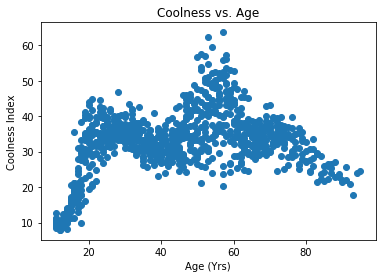

In [221]:
plt.scatter(x=cool.age, y=cool.coolness_index)
plt.xlabel("Age (Yrs)")
plt.ylabel("Coolness Index")
plt.title("Coolness vs. Age")
plt.show()

In [222]:
max(cool.iloc[:,1])
min(cool.iloc[:,1])

7.9425151153015054

2(b)

In [223]:
index = cool['coolness_index']
age = cool['age']
age_bin1 = (age < 22).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = ((age >= 77) & (age < 95)).astype(int)

In [224]:
X_step = pd.DataFrame(dict(age_bin1=age_bin1, age_bin2=age_bin2,
                           age_bin3=age_bin3, age_bin4=age_bin4,
                           age_bin5=age_bin5))

In [225]:
reg = sm.OLS(endog=index, exog=X_step, missing='drop')
reg_results = reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:         coolness_index   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     4280.
Date:                Mon, 19 Feb 2018   Prob (F-statistic):               0.00
Time:                        08:52:28   Log-Likelihood:                -3220.5
No. Observations:                 956   AIC:                             6451.
Df Residuals:                     951   BIC:                             6475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_bin1      20.1025      0.566     35.522      0.0

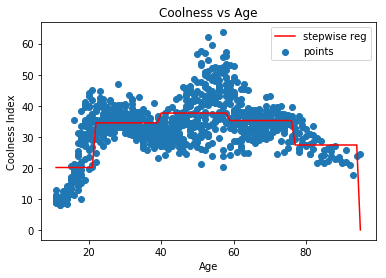

In [226]:
plt.scatter(age, index, label="points")
plt.plot(cool.age, reg_results.predict(X_step), color = 'r',label='stepwise reg')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.title('Coolness vs Age')
plt.show()

In [234]:
b1, b2, b3, b4, b5 = reg_results.params
print('beta_1 =', b1, ', beta_2 =', b2,
      ', beta_3 =', b3, ', beta_4 =', b4,
      ', beta_5 =', b5)

beta_1 = 20.1024572521 , beta_2 = 34.4757880776 , beta_3 = 37.6351054924 , beta_4 = 35.2254000402 , beta_5 = 27.3481669528


In [235]:
print('the predicted coolness for a 73-year old is approximately', reg_results.params[3])
reg_results.params

the predicted coolness for a 73-year old is approximately 35.2254000402


age_bin1    20.102457
age_bin2    34.475788
age_bin3    37.635105
age_bin4    35.225400
age_bin5    27.348167
dtype: float64

2(c)

In [228]:
knots = [22, 40, 59, 77]
spline_1 = LSQUnivariateSpline(age.values, index.values, knots, k=1)
pred_1 = spline_1(age)
pred_2 = spline_1(73)

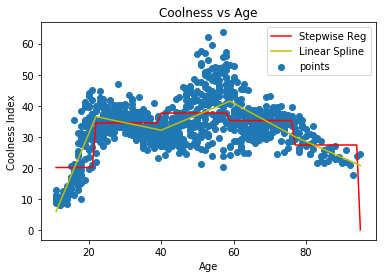

In [229]:
plt.scatter(age, index, label="points")
plt.plot(cool.age, reg_results.predict(X_step), color = 'r',label='Stepwise Reg')
plt.plot(cool.age, pred_1, color='y', label='Linear Spline')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.title('Coolness vs Age')
plt.show()

In [230]:
print('Predicted Coolness of a 73-year old is', pred_2)

Predicted Coolness of a 73-year old is 32.536832389143306


2(d)

In [231]:
knots = [22, 40, 59, 77]
spline_2 = LSQUnivariateSpline(age.values, index.values, knots, k=3)
pred_2 = spline_2(age)

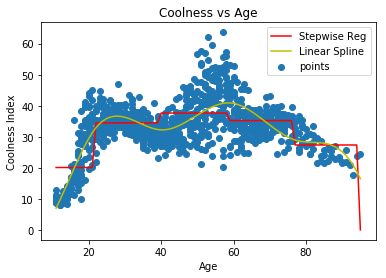

In [232]:
plt.scatter(age, index, label="points")
plt.plot(cool.age, reg_results.predict(X_step), color = 'r',label='Stepwise Reg')
plt.plot(cool.age, pred_2, color='y', label='Linear Spline')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.title('Coolness vs Age')
plt.show()

In [233]:
pred_3 = spline_2(73)
print('Predicted Coolness of a 73-year old is', pred_3)

Predicted Coolness of a 73-year old is 31.262429389257864
